In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'D:/.vscode/python/internship_2/titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()#or df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.shape

(891, 12)

# Data Cleaning

In [9]:
df.drop('PassengerId',inplace=True,axis=1)

In [10]:
df['Cabin'].count()/df.shape[0]

0.22895622895622897

In [11]:
df.drop('Cabin',inplace=True,axis=1)#because there is more than 70% empty values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [13]:
df['Age'].count()/df.shape[0]

0.8013468013468014

In [14]:
df.dropna(subset=['Age','Embarked'],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [16]:
df['Title']=df['Name'].str.extract(r'([A-Za-z]+\.)',expand=False)
df.drop('Name',inplace=True,axis=1)

In [17]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr.
6,0,1,male,54.0,0,0,17463,51.8625,S,Mr.
7,0,3,male,2.0,3,1,349909,21.0750,S,Master.
8,1,3,female,27.0,0,2,347742,11.1333,S,Mrs.
9,1,2,female,14.0,1,0,237736,30.0708,C,Mrs.
10,1,3,female,4.0,1,1,PP 9549,16.7000,S,Miss.


In [18]:
df['Survived'].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

# EDA

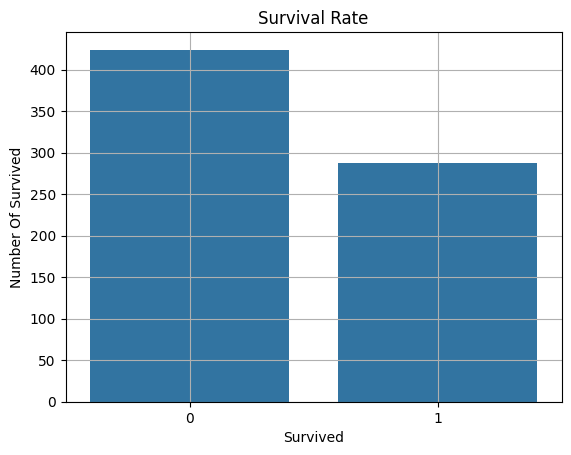

In [19]:
sns.countplot(data=df,x='Survived')
plt.ylabel('Number Of Survived')
plt.title('Survival Rate')
plt.grid()
plt.show()

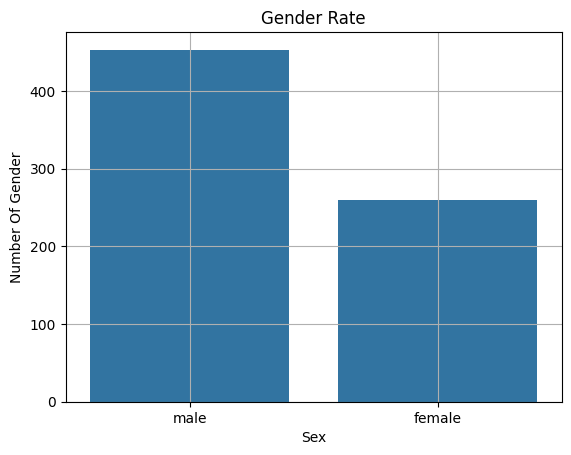

In [20]:
sns.countplot(x='Sex',data=df)
plt.ylabel('Number Of Gender')
plt.title('Gender Rate')
plt.grid()
plt.show()

In [21]:
df['Sex'].value_counts()

Sex
male      453
female    259
Name: count, dtype: int64

In [22]:
df['Pclass'].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

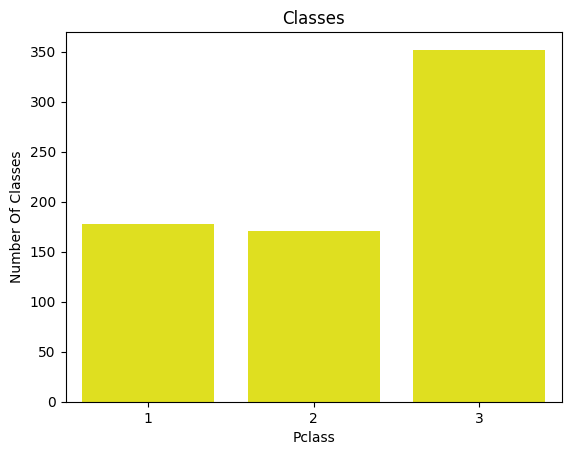

In [96]:
sns.countplot(x='Pclass',data=df,color='yellow')
plt.ylabel('Number Of Classes')
plt.title('Classes')
plt.show()

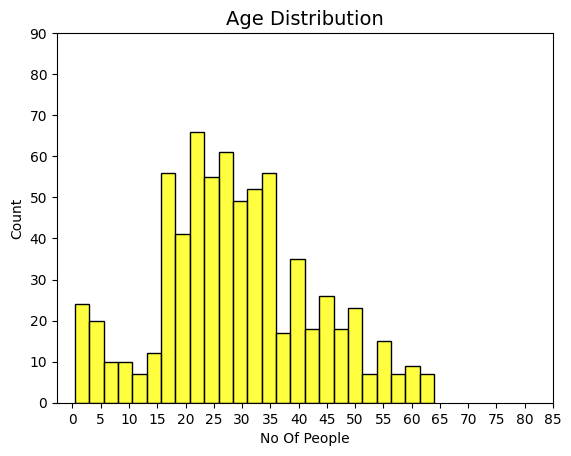

In [94]:
sns.histplot(df['Age'],bins=25,color='yellow')
plt.yticks(np.arange(0,100,10))
plt.xticks(np.arange(0,90,5))
plt.title('Age Distribution',fontsize=14)
plt.xlabel('No Of People')
plt.show()

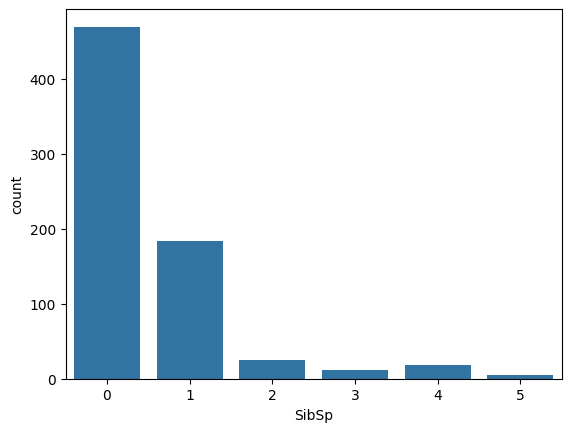

In [25]:
sns.countplot(x='SibSp',data=df)
plt.show()

<Axes: xlabel='Parch', ylabel='count'>

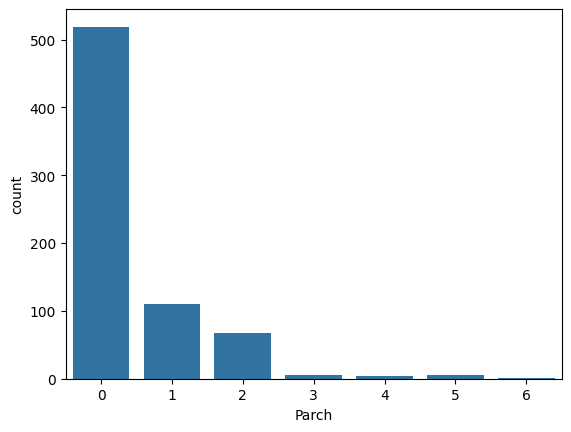

In [26]:
sns.countplot(x='Parch',data=df)

In [27]:
print('Siblings:\n',df['SibSp'].value_counts())
print('Parents : \n',df['Parch'].value_counts())

Siblings:
 SibSp
0    469
1    183
2     25
4     18
3     12
5      5
Name: count, dtype: int64
Parents : 
 Parch
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [28]:
df.min()

Survived         0
Pclass           1
Sex         female
Age           0.42
SibSp            0
Parch            0
Ticket      110152
Fare           0.0
Embarked         C
Title        Capt.
dtype: object

In [29]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [30]:
df.max()

Survived            1
Pclass              3
Sex              male
Age              80.0
SibSp               5
Parch               6
Ticket      WE/P 5735
Fare         512.3292
Embarked            S
Title            Sir.
dtype: object

In [31]:
df.mode()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,24.0,0,0,347082,13.0,S,Mr.


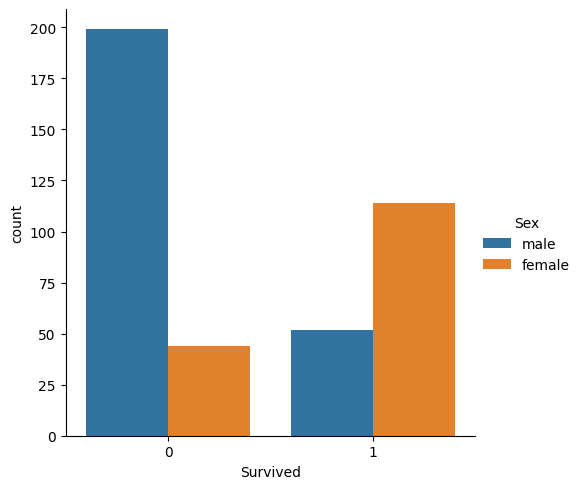

In [32]:
ind=df[df['Age']>30].index
df_1=df.drop(ind,axis=0)
sns.catplot(x='Survived',hue='Sex',kind='count',data=df_1)
plt.show()

In [33]:
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      360
          female     64
1         female    195
          male       93
Name: count, dtype: int64

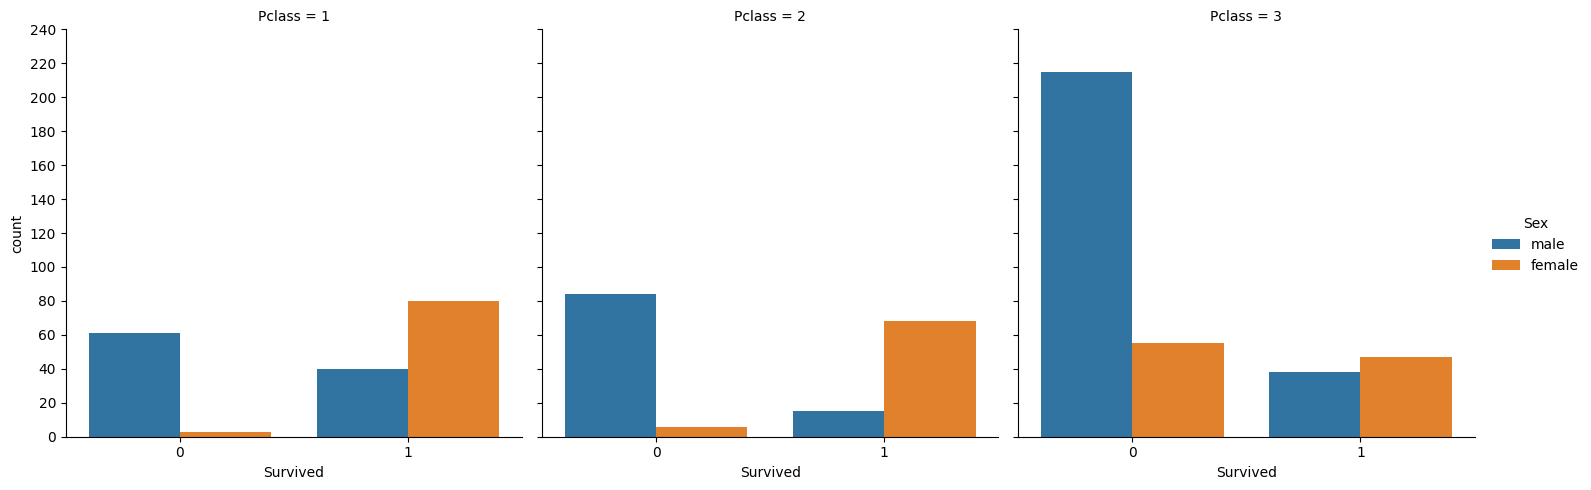

In [34]:
sns.catplot(x='Survived',hue='Sex',col='Pclass',data=df,kind='count')
plt.yticks(np.arange(0,250,20))
plt.show()

In [35]:
df.groupby(['Survived','Pclass'])['Sex'].value_counts()

Survived  Pclass  Sex   
0         1       male       61
                  female      3
          2       male       84
                  female      6
          3       male      215
                  female     55
1         1       female     80
                  male       40
          2       female     68
                  male       15
          3       female     47
                  male       38
Name: count, dtype: int64

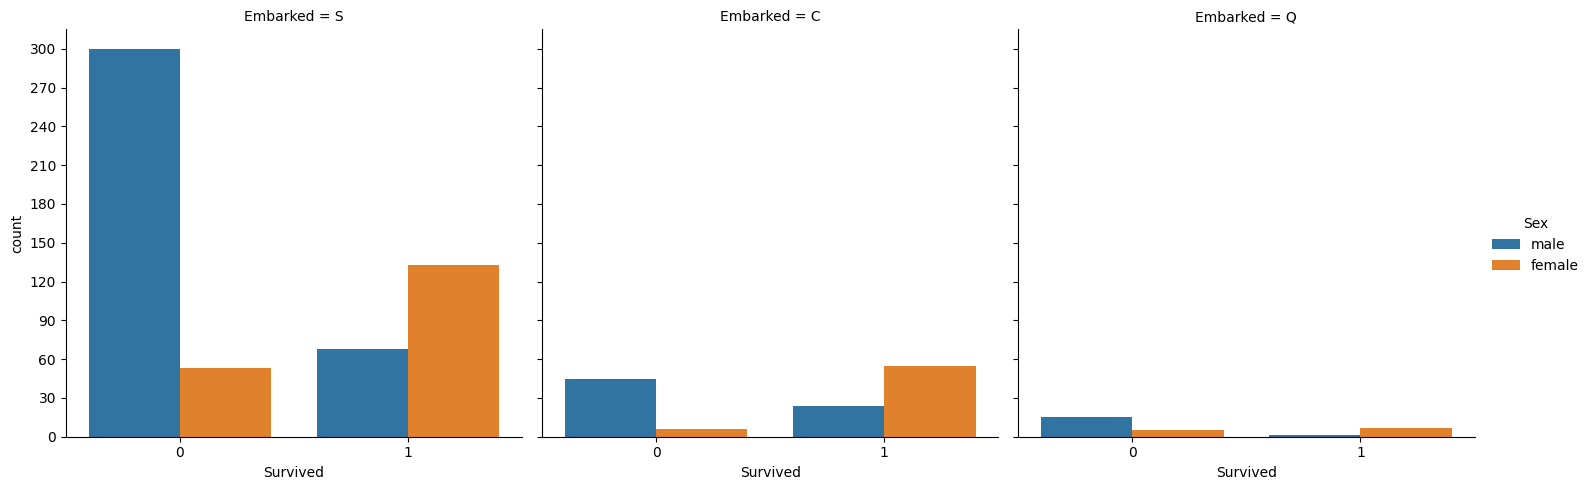

In [36]:
sns.catplot(x='Survived',hue='Sex',col='Embarked',data=df,kind='count')
plt.yticks(np.arange(0,330,30))
plt.show()

In [37]:
df.groupby(['Survived','Embarked'])['Sex'].value_counts()

Survived  Embarked  Sex   
0         C         male       45
                    female      6
          Q         male       15
                    female      5
          S         male      300
                    female     53
1         C         female     55
                    male       24
          Q         female      7
                    male        1
          S         female    133
                    male       68
Name: count, dtype: int64

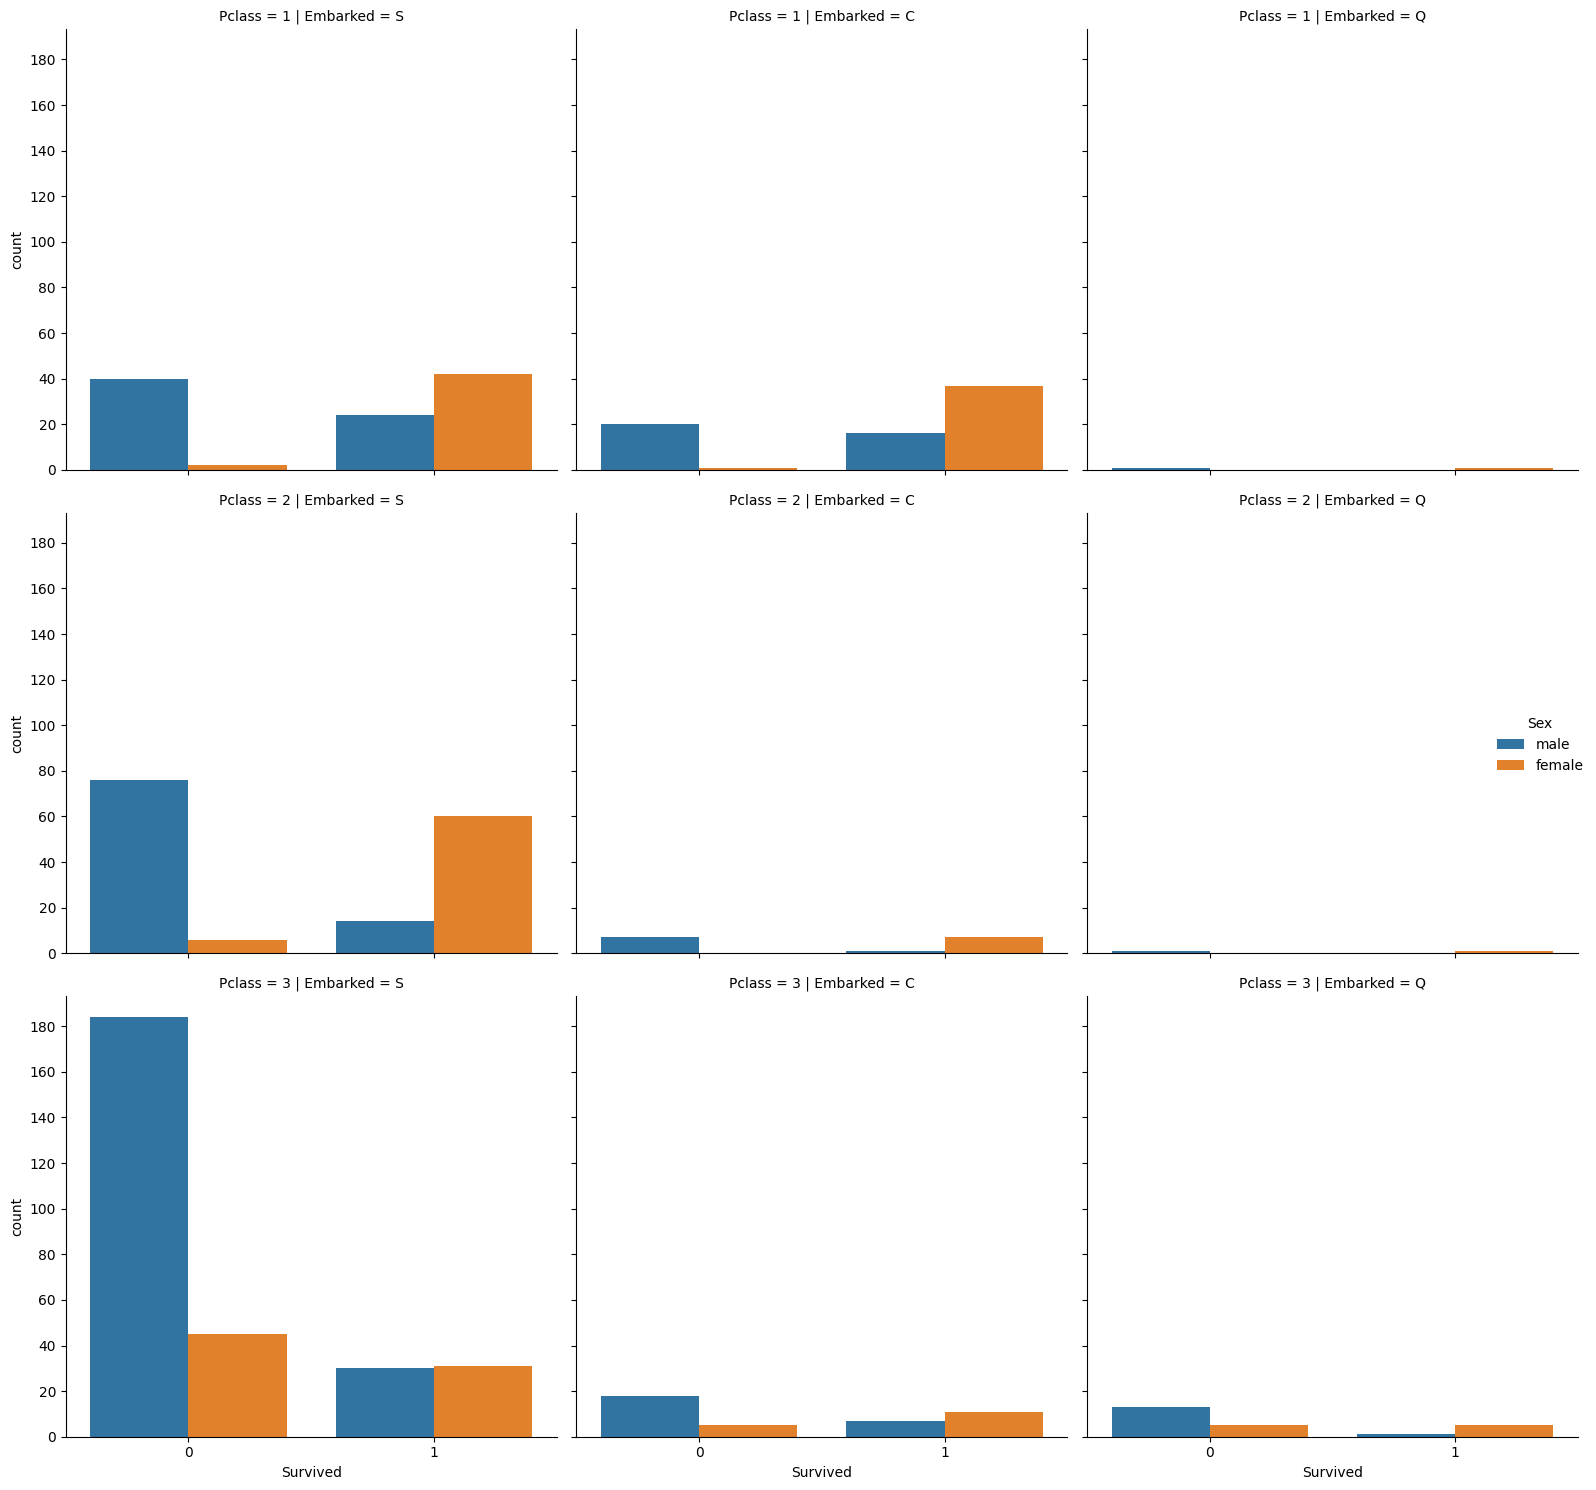

In [38]:
sns.catplot(x='Survived',hue='Sex',col='Embarked',row='Pclass',data=df,kind='count')
plt.yticks(np.arange(0,190,20))
plt.tight_layout()
plt.show()

In [39]:
df.groupby(['Survived','Embarked','Pclass'])['Sex'].value_counts()

Survived  Embarked  Pclass  Sex   
0         C         1       male       20
                            female      1
                    2       male        7
                    3       male       18
                            female      5
          Q         1       male        1
                    2       male        1
                    3       male       13
                            female      5
          S         1       male       40
                            female      2
                    2       male       76
                            female      6
                    3       male      184
                            female     45
1         C         1       female     37
                            male       16
                    2       female      7
                            male        1
                    3       female     11
                            male        7
          Q         1       female      1
                    2       female      1

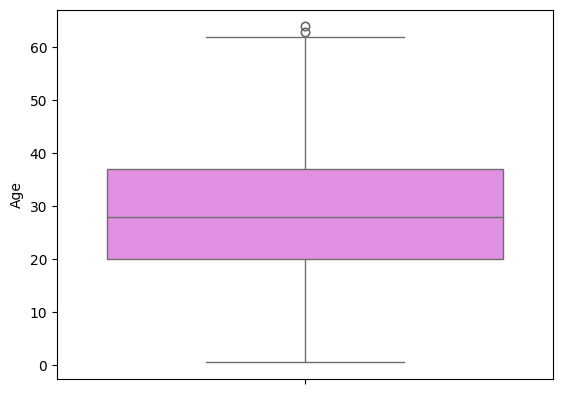

In [92]:
sns.boxplot(df['Age'],color='violet')
plt.show()

In [41]:
def boundaries(data,col,dis):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    low=Q1-(IQR*dis)
    upper=Q3+(IQR*dis)
    return low,upper

In [42]:
lower,upper=boundaries(df,'Age',1.5)
print('Lower Range : ',lower,' Upper Range : ',upper)

Lower Range :  -7.0  Upper Range :  65.0


In [43]:
#Age_out=np.where(df['Age']>upper,True,(np.where(df['Age']<lower,True,False)))
not_out=(df['Age']<upper)&(df['Age']>lower)
df['Age'][~not_out].count()

11

In [44]:
df=df[not_out]

C:\Users\HP\AppData\Local\Temp\ipykernel_14424\319497254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agebin']=pd.cut(df['Age'],5,labels=['a','b','c','d','e'],include_lowest=True)


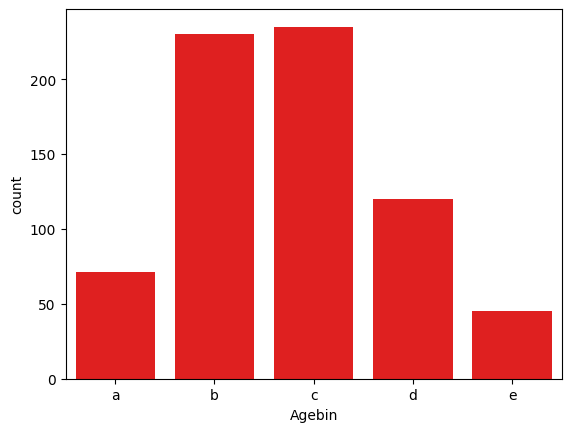

In [45]:
df['Agebin']=pd.cut(df['Age'],5,labels=['a','b','c','d','e'],include_lowest=True)
sns.countplot(x='Agebin',data=df,color='red')
plt.show()

In [46]:
df.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Agebin
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr.,b
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs.,c
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,c
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs.,c
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr.,c
6,0,1,male,54.0,0,0,17463,51.8625,S,Mr.,e
7,0,3,male,2.0,3,1,349909,21.0750,S,Master.,a
8,1,3,female,27.0,0,2,347742,11.1333,S,Mrs.,c
9,1,2,female,14.0,1,0,237736,30.0708,C,Mrs.,b
10,1,3,female,4.0,1,1,PP 9549,16.7000,S,Miss.,a


# Applying ML

In [47]:
df.drop(['Ticket','Agebin'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14424\2653946210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Ticket','Agebin'],axis=1,inplace=True)


In [48]:
from sklearn.preprocessing import LabelEncoder
lb_en=LabelEncoder()
df['Sex']=lb_en.fit_transform(df['Sex'])
df.head(50)

C:\Users\HP\AppData\Local\Temp\ipykernel_14424\3652989456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=lb_en.fit_transform(df['Sex'])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr.
1,1,1,0,38.0,1,0,71.2833,C,Mrs.
2,1,3,0,26.0,0,0,7.9250,S,Miss.
3,1,1,0,35.0,1,0,53.1000,S,Mrs.
4,0,3,1,35.0,0,0,8.0500,S,Mr.
6,0,1,1,54.0,0,0,51.8625,S,Mr.
7,0,3,1,2.0,3,1,21.0750,S,Master.
8,1,3,0,27.0,0,2,11.1333,S,Mrs.
9,1,2,0,14.0,1,0,30.0708,C,Mrs.
10,1,3,0,4.0,1,1,16.7000,S,Miss.


In [49]:
df['Embarked']=lb_en.fit_transform(df['Embarked'])
df['Title']=lb_en.fit_transform(df['Title'])
df.head(50)

C:\Users\HP\AppData\Local\Temp\ipykernel_14424\3008011088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked']=lb_en.fit_transform(df['Embarked'])
C:\Users\HP\AppData\Local\Temp\ipykernel_14424\3008011088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title']=lb_en.fit_transform(df['Title'])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,11
1,1,1,0,38.0,1,0,71.2833,0,12
2,1,3,0,26.0,0,0,7.9250,2,8
3,1,1,0,35.0,1,0,53.1000,2,12
4,0,3,1,35.0,0,0,8.0500,2,11
6,0,1,1,54.0,0,0,51.8625,2,11
7,0,3,1,2.0,3,1,21.0750,2,7
8,1,3,0,27.0,0,2,11.1333,2,12
9,1,2,0,14.0,1,0,30.0708,0,12
10,1,3,0,4.0,1,1,16.7000,2,8


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [51]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [53]:
Li_Re=LinearRegression()

In [54]:
Li_Re.fit(x_train,y_train)

LinearRegression()

In [55]:
y_test_pre=Li_Re.predict(x_test)

In [56]:
y_train_pre=Li_Re.predict(x_train)

In [57]:
r2_score(y_test,y_test_pre)

0.4128819598956135

In [58]:
r2_score(y_train,y_train_pre)

0.39151093034463913

In [59]:
#since it is classification problem not regression so

In [60]:
#lg_Re=LogisticRegression(max_iter=500)
best_params = {
    'C': 1,
    'max_iter': 100,
    'penalty': 'l1',
    'solver': 'liblinear'
}
lg_Re = LogisticRegression(**best_params)

In [61]:
lg_Re.fit(x_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [62]:
y_test_pre=lg_Re.predict(x_test)

In [63]:
y_train_pre=lg_Re.predict(x_train)

In [64]:
print(classification_report(y_test,y_test_pre))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       129
           1       0.79      0.82      0.80        82

    accuracy                           0.84       211
   macro avg       0.83      0.84      0.84       211
weighted avg       0.84      0.84      0.84       211



In [65]:
print(classification_report(y_train,y_train_pre))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       285
           1       0.77      0.71      0.74       205

    accuracy                           0.79       490
   macro avg       0.79      0.78      0.78       490
weighted avg       0.79      0.79      0.79       490



In [66]:
print('Accuracy : ',lg_Re.score(x_test,y_test)*100)

Accuracy :  84.36018957345972


In [67]:
kfd=KFold(n_splits=10,random_state=100,shuffle=True)

In [68]:
res=cross_val_score(lg_Re,x,y,cv=kfd,n_jobs=-1)
print('Accuracy : ',res.mean()*100)

Accuracy :  78.46478873239435


In [69]:
rkfd=RepeatedKFold(n_splits=10,random_state=100,n_repeats=2)
res1=cross_val_score(lg_Re,x,y,cv=rkfd,n_jobs=-1)
print('Accuracy : ',res1.mean()*100)

Accuracy :  78.95975855130786


In [70]:
skflod=StratifiedKFold(n_splits=10,random_state=100,shuffle=True)
res2=cross_val_score(lg_Re,x,y,cv=skflod,n_jobs=-1)
print('Accuracy : ',res2.mean()*100)

Accuracy :  79.46076458752515


In [71]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],  # Include only solvers compatible with l1 penalty
    'max_iter': [100, 200, 300,500]
}


# Create a GridSearchCV instance
grid_search = GridSearchCV(lg_Re, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [72]:
print(best_model,best_params)

LogisticRegression(C=1, penalty='l1', solver='liblinear') {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [73]:
from sklearn.tree import DecisionTreeClassifier
#DTC=DecisionTreeClassifier()
DTC= DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=2, splitter='random')

In [74]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=2, splitter='random')

In [75]:
y_pre_test=DTC.predict(x_test)

In [76]:
y_pre_train=DTC.predict(x_train)

In [77]:
print(classification_report(y_test,y_pre_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       129
           1       0.73      0.78      0.75        82

    accuracy                           0.80       211
   macro avg       0.79      0.80      0.79       211
weighted avg       0.80      0.80      0.80       211



In [78]:
print(classification_report(y_train,y_pre_train))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       285
           1       0.76      0.69      0.72       205

    accuracy                           0.78       490
   macro avg       0.77      0.76      0.77       490
weighted avg       0.78      0.78      0.78       490



In [79]:
print(DTC.score(x_test,y_test)*100)

80.09478672985783


In [80]:
kflod=KFold(n_splits=220,random_state=100,shuffle=True)
D_res=cross_val_score(DTC,x,y,cv=kflod,n_jobs=-1)
print('Accuracy : ',D_res.mean()*100)

Accuracy :  78.56060606060605


In [81]:
refold=RepeatedKFold(n_splits=220,random_state=100,n_repeats=3)
D_res1=cross_val_score(DTC,x,y,cv=refold,n_jobs=-1)
print('Accuracy : ',D_res1.mean()*100)

Accuracy :  78.76262626262627


In [82]:
skfoldd=StratifiedKFold(n_splits=220,random_state=100,shuffle=True)
D_res2=cross_val_score(DTC,x,y,cv=skfoldd,n_jobs=-1)
print('Accuracy : ',D_res2.mean()*100)

Accuracy :  78.82575757575758


In [83]:
param_grid1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'class_weight': [None, 'balanced']}
    
gir_sear=GridSearchCV(DTC,param_grid1,cv=5,n_jobs=-1)
gir_sear.fit(x_train,y_train)
print(gir_sear.best_params_,gir_sear.best_estimator_,gir_sear.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'} DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       splitter='random') 0.8020408163265305


In [84]:
#RFC=RandomForestClassifier()
RFC=RandomForestClassifier(bootstrap= False, max_depth=10, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 10, n_estimators= 50,random_state=42)

In [85]:
RFC.fit(x_train,y_train)
y_rfc_pre_test=RFC.predict(x_test)
y_rfc_pre_train=RFC.predict(x_train)

In [86]:
print(classification_report(y_train,y_rfc_pre_train))
print(classification_report(y_test,y_rfc_pre_test))
print(confusion_matrix(y_test,y_rfc_pre_test))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       285
           1       0.95      0.77      0.85       205

    accuracy                           0.89       490
   macro avg       0.90      0.87      0.88       490
weighted avg       0.89      0.89      0.88       490

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       129
           1       0.83      0.83      0.83        82

    accuracy                           0.87       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.87      0.87      0.87       211

[[115  14]
 [ 14  68]]


In [87]:
print(RFC.score(x_test,y_test))

0.8672985781990521


In [88]:
kfd_rfc=KFold(n_splits=10,shuffle=True,random_state=100)
res_kfd=cross_val_score(RFC,x,y,cv=kfd_rfc,n_jobs=-1)
print('Accuracy : ',res_kfd.mean()*100)

Accuracy :  82.46076458752513


In [89]:
rkfd_rfc=RepeatedKFold(n_splits=10,n_repeats=3,random_state=100)
res_rkfd=cross_val_score(RFC,x,y,cv=rkfd_rfc,n_jobs=-1)
print('Accuracy : ',res_rkfd.mean()*100)

Accuracy :  81.74111334674716


In [90]:
sk_res=StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
res_sk=cross_val_score(RFC,x,y,cv=sk_res,n_jobs=-1)
print('Accuracy : ',res_sk.mean()*100)

Accuracy :  81.59758551307847


In [91]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(x_train, y_train)  # Replace X_train and y_train with your data

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8020408163265307
